# Tugas Besar 1 Machine Learning

## About
Feedforward Neural Network algorithm with rectified linear unit (ReLU) and sigmoid activation function.

### Features

### Usage

### Tech stack
* ![Python](https://img.shields.io/badge/Python-3776AB?style=for-the-badge&logo=python&logoColor=white)

## Author
| Name | NIM |
| :--- | :---: |
| Angger Ilham Amanullah | 13521001 |
| Kelvin Rayhan Alkarim | 13521005 |
| Ditra Rizqa Amadia | 13521019 |
| Bernardus Willson | 13521021 |

<hr>

> Make sure required modules are imported

In [37]:
# Modules
import json
import numpy as np
from graphviz import Digraph, Source
from IPython.display import display

### Classes

In [38]:
class Driver:
    @staticmethod
    def terminate(code):
        print(f"[■] Program terminated with code {code}")
        quit(code)

    @staticmethod
    def load_model(model_file):
        try:
            model = json.load(open(model_file, "r"))
        except:
            print(f"[✖] Error loading model from '{model_file}'")
            print("")

            Driver.terminate(1)        
            
        print(f"[✔] Successfully loaded model from '{model_file}'")
        print("")

        return model

In [39]:
class Layer:
    # Initialize layer
    def __init__(self, id, layer, weight, input):
        try:
            self._id = id
            self._num_of_neuron = layer["number_of_neurons"]
            self._activation_function = layer["activation_function"]
            self._weight = weight
            self._input = input       
            self._input = np.insert(self._input, 0, 1) # Append bias of 1
            self._sigma = np.zeros(self._num_of_neuron)
            self._output = np.zeros(self._num_of_neuron)
        except:
            print(f"[✖] Error initialiazing layer")
            print("")

            Driver.terminate(1)

    # Calculate sigma
    def _calculate_sigma(self, i):
        for j in range(len(self._input)):
            self._sigma[i] += self._input[j] * self._weight[j][i]

    # Calculate activation
    def _calculate_activation(self, i):
        if self._activation_function == 'relu':
            self._output[i] = max(0, self._sigma[i])
        elif self._activation_function == 'sigmoid':
            self._output[i] = 1 / (1 + np.exp(-self._sigma[i]))
        elif self._activation_function == 'linear':
            self._output[i] = self._sigma[i]
        elif self._activation_function == 'softmax':
            exp_values = np.exp(self._sigma - np.max(self._sigma))
            self._output = exp_values / np.sum(exp_values)

    # Build the layer
    def build(self):
        print(f"[●] Building layer {self._id}")

        # For each neuron, calculate its activation
        for i in range(self._num_of_neuron):
            self._calculate_sigma(i)
            self._calculate_activation(i)

        print(f"[✔] Successfully built layer {self._id}")
        print(f"Number of neurons: {self._num_of_neuron}")
        print(f"Activation function: {self._activation_function}")
        for i in range(len(self._output)):
            print(f"h{self._id}{i}: {self._output[i]}")
        print("")
        
        return self._output

In [40]:
class FFNN:
    # Initialize model
    def __init__(self, model):
        try:
            self._layers = model["case"]["model"]["layers"]
            self._weights = model["case"]["weights"]
            self._inputs = model["case"]["input"]
            self._outputs = []
            self._outputs
            self._expect = model["expect"]
        except:
            print(f"[✖] Error initialiazing model")
            print("")

            Driver.terminate(1)
        
        print(f"[✔] Successfully initialized model")
        print(f"Number of features: {model['case']['model']['input_size']}")
        print(f"Number of layers: {len(self._layers)}")
        print(f"Number of data: {len(self._inputs)}")
        print("")

    # Assert the output with the expected output
    def test(self):
        print(f"[●] Asserting output =======================================")

        passed_output = 0
        for i in range(len(self._inputs)):
            if (np.all(self._expect['output'][i] < self._outputs[i] + self._expect['max_sse']) or np.all(self._expect['output'][i] > self._outputs[i] - self._expect['max_sse'])):
                passed_output += 1

        print(f"Test status: {'FAIL' if passed_output != len(self._inputs) else 'PASS'}")
        print(f"Test result: {passed_output}/{len(self._inputs)}")
        print("")
    
    # Build the network
    def build(self):
        
        # Calculate output for each input
        for i in range(len(self._inputs)):

            print(f"[●] Evaluating data {i + 1} ====================================")
            print("")

            _in = self._inputs[i]

            # Build each layer
            for j in range(len(self._layers)):
                
                # Create layer
                layer = Layer(j, self._layers[j], self._weights[j], _in)

                # Build layer
                _in = layer.build()
            
            self._outputs.append(_in)

            print(f"[✔] Successfully evaluated data {i + 1}")
            print(f"Input: {self._inputs[i]}")
            print(f"Output: {self._outputs[i]}")
            print("")

    def visualize(self):
        dot = Digraph()
        dot.attr('node', shape='circle', width='0.5', height='0.5')

        # No hidden layer
        if len(self._layers) == 1:
            # Input layer
            dot.node("b1", "b1", color='#ffe79b')
            for i in range(len(self._inputs[0])):
                dot.node(f"x{i + 1}", f"x{i + 1}", color='#ffe79b')

            # Output layer
            for i in range(self._layers[0]["number_of_neurons"]):
                dot.node(f"y{i + 1}", f"y{i + 1}", color='#47daff')

            # Add edges from input layer to output layer
            for i in range(len(self._inputs[0])):
                for j in range(self._layers[0]["number_of_neurons"]):
                    weight = self._weights[0][i + 1][j]
                    dot.edge(f"x{i + 1}", f"y{j + 1}", label=f"{weight:.2f}")
                    
            # Add edges from bias
            for i in range(len(self._outputs[0])):
                weight = self._weights[0][0][i]
                dot.edge("b1", f"y{i + 1}", label=f"{weight:.2f}")
            
        else:
            # Input layer
            dot.node("b1", "b1", color='#ffe79b')
            for i in range(len(self._inputs[0])):
                dot.node(f"x{i + 1}", f"x{i + 1}", color='#ffe79b')

            # Hidden layer
            for i in range(len(self._layers) - 1):
                dot.node(f"b{i + 2}", f"b{i + 2}", color='#ffa500')
                for j in range(self._layers[i]["number_of_neurons"]):
                    dot.node(f"h{i + 1}{j + 1}", f"h{i + 1}{j + 1}", color='#ffa500')

                if i == 0:
                    # Add edges from input layer to hidden layer
                    for j in range(len(self._inputs[0])):
                        for k in range(self._layers[i]["number_of_neurons"]):
                            weight = self._weights[i][j + 1][k]
                            dot.edge(f"x{j + 1}", f"h{i + 1}{k + 1}", label=f"{weight:.2f}")
                    # Add edges from bias
                    for j in range(len(self._weights[i][0])):
                        weight = self._weights[i][0][j]
                        dot.edge("b1", f"h{i + 1}{j + 1}", label=f"{weight:.2f}")

                else:
                    # Add edges from hidden layer to hidden layer
                    for j in range(self._layers[i - 1]["number_of_neurons"]):
                        for k in range(self._layers[i]["number_of_neurons"]):
                            weight = self._weights[i][j + 1][k]
                            dot.edge(f"h{i}{j + 1}", f"h{i + 1}{k + 1}", label=f"{weight:.2f}")
                    # Add edges from bias
                    for j in range(len(self._weights[i][0])):
                        weight = self._weights[i][0][j]
                        dot.edge(f"b{i + 1}", f"h{i + 1}{j + 1}", label=f"{weight:.2f}")
                        
            # Output layer
            for i in range(self._layers[-1]["number_of_neurons"]):
                dot.node(f"y{i + 1}", f"y{i + 1}", color='#47daff')

            # Add edges from hidden layer to output layer
            for i in range(self._layers[-2]["number_of_neurons"]):
                for j in range(len(self._outputs[0])):
                    weight = self._weights[-1][i + 1][j]
                    dot.edge(f"h{len(self._layers) - 1}{i + 1}", f"y{j + 1}", label=f"{weight:.2f}")

            # Add edges from bias
            for i in range(len(self._outputs[0])):
                weight = self._weights[-1][0][i]
                dot.edge(f"b{len(self._layers)}", f"y{i + 1}", label=f"{weight:.2f}")

        src = Source(dot.source)
        display(src)

In [41]:
model_file = 'models/sigmoid.json'

[✔] Successfully loaded model from 'models/sigmoid.json'

[✔] Successfully initialized model
Number of features: 3
Number of layers: 2
Number of data: 5

[●] Evaluating data 1 ====================================

[●] Building layer 0
[✔] Successfully built layer 0
Number of neurons: 2
Activation function: sigmoid
h00: 0.9860743596934995
h01: 0.021041347020468275

[●] Building layer 1
[✔] Successfully built layer 1
Number of neurons: 4
Activation function: sigmoid
h10: 0.41197345561004917
h11: 0.8314293993694081
h12: 0.5301853632739774
h13: 0.31607396490909706

[✔] Successfully evaluated data 1
Input: [-0.6, 1.6, -1.0]
Output: [0.41197346 0.8314294  0.53018536 0.31607396]

[●] Evaluating data 2 ====================================

[●] Building layer 0
[✔] Successfully built layer 0
Number of neurons: 2
Activation function: sigmoid
h00: 0.9234378026481879
h01: 0.8005922431513315

[●] Building layer 1
[✔] Successfully built layer 1
Number of neurons: 4
Activation function: sigmoid
h10: 

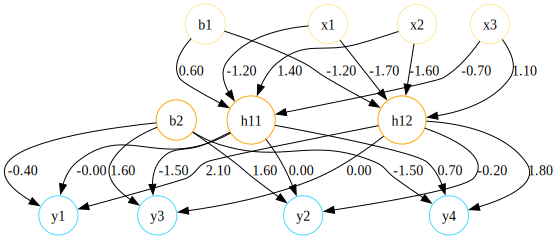

In [42]:
# Input
model_json = Driver.load_model(model_file)

# Initialize FFNN
model = FFNN(model_json)

# Build FNN
model.build()

# Test the output
model.test()

# Visualize the network
model.visualize()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ad693be4-3a1e-4be5-9f4f-9f4a320647d1' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>